<h1><b>IDS 575 PROGRAMMING ASSIGNMENT 5</b></h1>
<b>SUBMITTED BY :</b><br>
SAKSHAM SOMANI (UIN: 660833779)<br>
KUMUD DUBEY ( UIN: 669266909)<br>
YEN TRAN (UIN: 662783209)<br>
DIVYA KAMMA (UIN: 670505193)

## Import Libraries
* See various conventions and acronyms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

## Load the data
* Verify Python type for the dataset.

In [2]:
WHDataset = pd.read_csv('WeightAndHeight.csv')
print(type(WHDataset))
print(WHDataset.keys())

<class 'pandas.core.frame.DataFrame'>
Index(['Weight', 'Height'], dtype='object')


## Verify basic data statistics
* Count the number of features. (i.e., attributes)
* Count the number of examples. (i.e., instances and labels)
* No class labels

In [3]:
def printBasicStats(dataset):
  print('- # of features = %d' % (len(dataset.keys())))
  print('- # of examples = %d' % len(dataset))
  
printBasicStats(WHDataset)
print(WHDataset)

- # of features = 2
- # of examples = 500
        Weight      Height
0    67.062924  176.086355
1    68.804094  178.388669
2    60.930863  170.284496
3    59.733843  168.691992
4    65.431230  173.763679
..         ...         ...
495  59.976983  169.679741
496  66.423814  174.625574
497  53.604698  161.919208
498  50.433644  160.794875
499  60.224392  169.689709

[500 rows x 2 columns]


View the summary of X to make sure all features are numerical. K-means is performed only on the numerical data. If you have categorical variables, you need to convert them into integers

In [4]:
WHDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Data inspection
* See correlations between features.
* Draw heatmap


          Weight    Height
Weight  1.000000  0.957441
Height  0.957441  1.000000


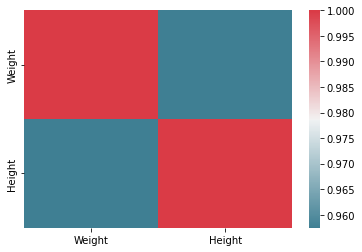

In [5]:
print(WHDataset.corr())

import seaborn as sns
sns.heatmap(WHDataset.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))

# **1. K-Means**

## Using existing library sklearn.cluster.KMeans¶
* Use only two columns for visulization
* Fit and predict. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Find the best number of k.


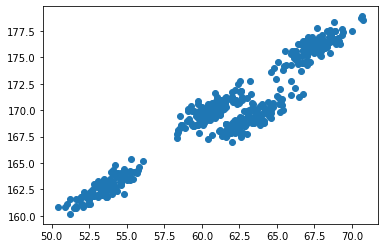

In [6]:
plt.scatter(WHDataset['Weight'],WHDataset['Height'])
plt.show()

In [7]:
kmeans = KMeans(n_clusters=4, init='random',random_state=5) 
# initializing methods:
# ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
# ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

kmeans.fit(WHDataset)

KMeans(init='random', n_clusters=4, random_state=5)

**Clustering results**

In [8]:
identified_clusters = kmeans.fit_predict(WHDataset)
identified_clusters

array([0, 0, 3, 3, 0, 3, 1, 3, 1, 2, 1, 0, 1, 2, 3, 3, 0, 3, 2, 3, 3, 0,
       1, 2, 3, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 3, 0,
       1, 0, 1, 3, 0, 0, 2, 2, 1, 1, 3, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       3, 0, 3, 1, 2, 3, 2, 0, 2, 0, 1, 1, 3, 3, 2, 3, 2, 1, 3, 1, 2, 2,
       0, 2, 2, 2, 0, 2, 3, 3, 0, 0, 0, 3, 2, 2, 0, 2, 3, 3, 3, 0, 3, 2,
       2, 1, 2, 2, 0, 2, 0, 3, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 3, 2,
       1, 2, 2, 2, 3, 0, 3, 1, 0, 0, 0, 0, 1, 2, 1, 3, 1, 2, 2, 0, 3, 3,
       3, 1, 1, 0, 3, 3, 0, 3, 0, 0, 1, 1, 0, 3, 2, 1, 0, 2, 0, 1, 1, 2,
       1, 2, 2, 2, 0, 0, 1, 3, 3, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 3, 1,
       3, 2, 2, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 0, 0, 0, 3, 0, 1, 2, 2, 2,
       1, 0, 1, 2, 1, 0, 2, 3, 2, 3, 1, 1, 3, 1, 3, 1, 3, 1, 2, 0, 0, 1,
       3, 0, 2, 2, 3, 0, 3, 1, 3, 1, 0, 2, 3, 2, 2, 1, 2, 1, 3, 3, 0, 2,
       0, 0, 3, 3, 2, 0, 3, 2, 0, 3, 0, 2, 1, 1, 3, 0, 0, 3, 0, 1, 0, 3,
       1, 0, 3, 3, 3, 0, 2, 2, 0, 2, 2, 2, 3, 0, 0,

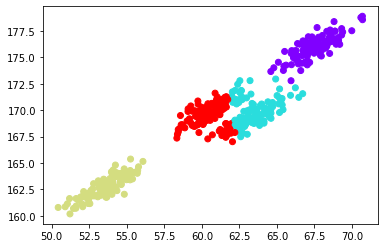

In [9]:
# plot clusters in different colors
data_with_clusters = WHDataset.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Weight'],data_with_clusters['Height'],c=data_with_clusters['Clusters'],cmap='rainbow')


## Finding optimum number of clusters

In [10]:
clursters_range = [2,3,4,5,6,7,8,9,10]
inertias = []

for k in clursters_range:
  kmeans = KMeans (init='k-means++',n_clusters=k, n_init=100, random_state=0).fit(WHDataset)
  inertias.append(kmeans.inertia_) 
  # kmeans,inertia_ is the Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

**Elbow Method:**
Find apoint which represents the most parsimonious balance between minimizing the number of clusters and minimizing the variance within each cluster

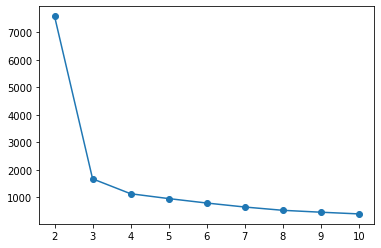

In [11]:
plt.figure()
plt.plot(clursters_range, inertias, marker='o')
plt.show()

**Silhouette value Method:**
*  use all the columns this time
*  we want to have high silhouette coefficient for the number of clusters we want to use



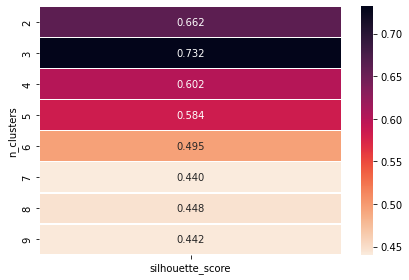

In [12]:
from sklearn.metrics import silhouette_score, silhouette_samples

clursters_range = range(2,10)
results = []

for k in clursters_range:
  kmeans = KMeans (init='k-means++',n_clusters=k, n_init=100, random_state=0)
  cluster_labels = kmeans.fit_predict(WHDataset)
  silhouette_avg = silhouette_score(WHDataset, cluster_labels)
  results.append([k, silhouette_avg])

result = pd.DataFrame(results, columns=['n_clusters','silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=0.5, fmt='0.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

# **2. Gaussian mixture models**
## Using existing library sklearn.mixture.GaussianMixture

In [13]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components = 4) 
gmm.fit(WHDataset)

GaussianMixture(n_components=4)

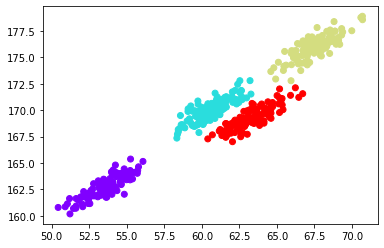

In [14]:
# Visualizing the clustering 
plt.scatter(WHDataset['Weight'], WHDataset['Height'],  
           c = GaussianMixture(n_components = 4).fit_predict(WHDataset), cmap ="rainbow") 
plt.show() 
# better than KMeans

Draw ellipse

In [15]:

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X["Weight"], X["Height"], c=labels, s=40, cmap='rainbow', zorder=2)
    else:
        ax.scatter(X["Weight"], X["Height"], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

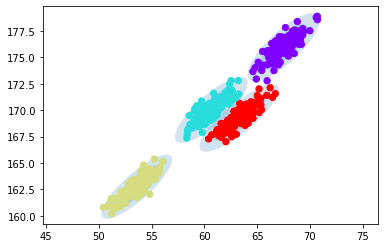

In [16]:
plot_gmm(gmm, WHDataset)

# Programming Assignment (PA)
* Implement your own K-Means function
* Implement you own EM algorithm for GMM

## K-Means from scratch

In [17]:
# Implement your own K-Means function
class MyKMeans:  
  cluster_labels = None
  centroids = None

  def fit(self, X, k):
    if isinstance(X, pd.DataFrame):
      X = X.values

    centroidsChanged = 1
    self.cluster_labels = np.zeros(X.shape[0]) 

    # Selecting K random centroids
    random.seed(123)
    self.centroids = WHDataset.sample(n=k).values
   
    # Creating a loop to calculate the distance to each current centroid and updating it
    # Find the distance and store it in minimum_dist
    while centroidsChanged:
      for i, row in enumerate(X):
        minimum_dist = float('inf')

        # Calcualte the dist of the point from all centroids
        for i_centroid, centroid in enumerate(self.centroids):
          dist = np.sqrt((centroid[0] - row[0])**2 + (centroid[1] - row[1])**2)

          if minimum_dist > dist:
            minimum_dist = dist
            self.cluster_labels[i] = i_centroid

      new_centroids = pd.DataFrame(X).groupby(by=self.cluster_labels).mean().values
      ###############################################################
      # if centroids are same then leave
      if np.count_nonzero(self.centroids - new_centroids) == 0:
        centroidsChanged = 0
      else:
        self.centroids = new_centroids
    
    return self.centroids, self.cluster_labels  



Test your code

In [18]:
mykmeans = MyKMeans()
centroids, clusters = mykmeans.fit(WHDataset,4)
print (centroids, clusters)

[[ 54.45861629 163.54515988]
 [ 67.48040873 175.86017523]
 [ 52.78221354 162.0209843 ]
 [ 61.91101547 169.61922731]] [1. 1. 3. 3. 1. 3. 3. 3. 3. 2. 3. 1. 3. 2. 3. 3. 1. 3. 0. 3. 3. 1. 3. 2.
 3. 0. 1. 3. 0. 3. 3. 3. 1. 3. 3. 1. 2. 3. 2. 1. 2. 3. 3. 1. 3. 1. 3. 3.
 1. 1. 2. 2. 1. 3. 3. 3. 3. 2. 0. 1. 1. 0. 1. 1. 1. 3. 3. 1. 3. 3. 2. 3.
 2. 1. 2. 1. 3. 3. 3. 3. 2. 3. 0. 3. 3. 3. 2. 0. 1. 0. 0. 0. 1. 0. 3. 3.
 1. 1. 1. 3. 2. 0. 1. 0. 3. 3. 3. 1. 3. 0. 0. 3. 0. 0. 1. 2. 1. 3. 3. 1.
 3. 2. 1. 1. 0. 1. 1. 1. 1. 0. 3. 0. 3. 2. 0. 0. 3. 1. 3. 3. 1. 1. 1. 1.
 3. 0. 3. 3. 3. 2. 0. 1. 3. 3. 3. 3. 3. 1. 3. 3. 1. 3. 1. 1. 3. 3. 1. 3.
 2. 3. 1. 2. 1. 3. 3. 2. 3. 2. 2. 0. 1. 1. 1. 3. 3. 0. 3. 1. 3. 0. 1. 3.
 2. 3. 3. 2. 3. 3. 3. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 1. 1. 1. 3. 1.
 3. 2. 0. 2. 3. 1. 3. 0. 3. 1. 0. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 1.
 1. 3. 3. 1. 2. 0. 3. 1. 3. 3. 3. 3. 1. 2. 3. 0. 2. 3. 0. 3. 3. 3. 1. 2.
 1. 1. 3. 3. 2. 1. 3. 2. 1. 3. 1. 2. 3. 3. 3. 1. 1. 3. 1. 3. 1. 3. 3. 1.
 3. 3. 

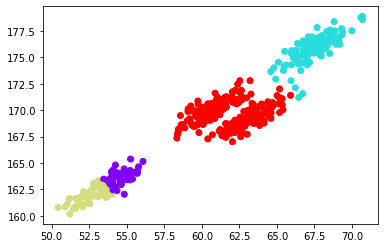

In [19]:
# plot clusters in different colors, and compare with the result using built-in kmeans
data_with_clusters = WHDataset.copy()
data_with_clusters['Clusters'] = clusters 
plt.scatter(data_with_clusters['Weight'],data_with_clusters['Height'],c=data_with_clusters['Clusters'],cmap='rainbow')


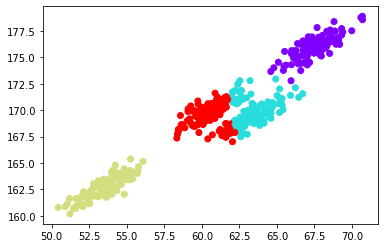

This plot has been copied from the above results from the library was used to define kMeans. 

Result: We get the same result after writing the code from scratch for defining centroids. 

## GMM from scratch

In [20]:
from scipy.stats import multivariate_normal 

class MyGMM:
    random.seed(123)
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter) 

    def initialize(self, X):
        # convert pd.dataframe to np.array
        X = X.to_numpy()
        # returns the (r,c) value of the numpy array of X
        self.shape = X.shape 
        # n has the number of rows while m has the number of columns of dataset X
        self.n, self.m = self.shape 
        

        # initial weights given to each cluster are stored in phi or P(Ci=j)
        self.phi = np.full(shape=self.k, fill_value=1/self.k) 

        # initial weights given to each data point wrt to each cluster or P(Xi/Ci=j)
        self.probs = np.full(shape=self.shape, fill_value=1/self.k)
        
        # dataset is divided randomly into k parts of unequal sizes
        random_row = np.random.randint(low=0, high=self.n, size=self.k)

        # initial value of mean of k Gaussians
        self.mu = [  X[row_index,:] for row_index in random_row ] 

        # initial value of covariance matrix of k Gaussians
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ] 
        # theta =(mu1,sigma1,mu2,simga2......muk,sigmak)

    # E-Step: update weights and phi holding mu and sigma constant
    def e_step(self, X):
        # updated weights or P(Xi/Ci=j)
        self.probs = self.predict_proba(X) 
        # you need to implement "predic_proba" function below
        # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster k or (phi)k
        self.phi = self.probs.mean(axis=0)
        

    # M-Step: update meu and sigma holding phi and weights constant
    def m_step(self, X):
        for i in range(self.k):
            # Finding mu and sigma 
            probs = self.probs[:, [i]]
            total_probability = probs.sum()

            self.mu[i] = (X * probs).sum(axis=0) / total_probability
            self.sigma[i] = np.cov(X.T, 
                aweights=(probs/total_probability).flatten(), 
                bias=True)
            #########################################################

    # responsible for clustering the data points correctly
    def fit(self, X):
        # initialise parameters like weights, phi, meu, sigma of all Gaussians in dataset X
        self.initialize(X)

        for iteration in range(self.max_iter):
            # iterate to update the value of P(Xi/Ci=j) and (phi)k
            self.e_step(X)
            # iterate to update the value of meu and sigma as the clusters shift
            self.m_step(X)
            
    # predicts probability of each data point wrt each cluster
    def predict_proba(self, X):
        # Creates a n*k matrix denoting probability of each point wrt each cluster 
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
          distribution = multivariate_normal(mean=self.mu[i], cov=self.sigma[i])
          likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        probs = numerator / denominator

        return probs
    ###############################################################
    
    
    # predict function 
    def predict(self, X):
        probs = self.predict_proba(X)
        # datapoint belongs to cluster with maximum probability
        # returns this value
        return np.argmax(probs, axis=1)

Try MyGMM

In [21]:
mygmm = MyGMM(k=4, max_iter=100)
mygmm.fit(WHDataset)

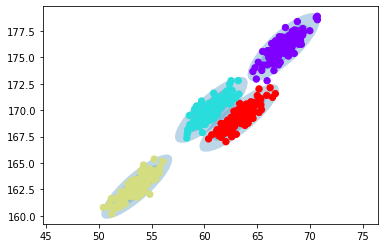

In [22]:
# plot mygmm result
def plot_mygmm(mygmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = mygmm.predict(X)
  
    if label:
        ax.scatter(X["Weight"], X["Height"], c=labels, s=40, cmap='rainbow', zorder=2)
    else:
        ax.scatter(X["Weight"], X["Height"], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.3 / mygmm.phi.max()
    for pos, covar, w in zip(mygmm.mu, mygmm.sigma, mygmm.phi):
        draw_ellipse(pos, covar, alpha=w * w_factor)

plot_mygmm(mygmm, WHDataset)

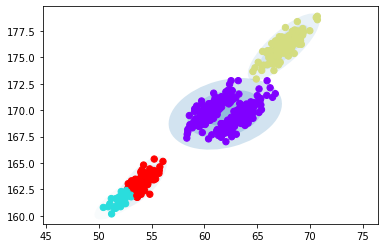

This is the plot we get from the above code by using the library. 
Result: We get the slightly different plot after writing the code for GMM from scratch